# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn import cluster, datasets
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [39]:

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [49]:
kmeans = KMeans(n_clusters=8)
data_clusters8 = kmeans.fit(X)
y_pred = data_clusters8.predict(X)
score = silhouette_score(X, y_pred)
score

0.5406824747857623

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [50]:
kmeans = KMeans(n_clusters=5)
data_clusters5 = kmeans.fit(X)
y_pred = data_clusters5.predict(X)
score = silhouette_score(X, y_pred)
score

0.5489993239795687

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [51]:
kmeans = KMeans(n_clusters=3)
data_clusters3 = kmeans.fit(X)
y_pred = data_clusters3.predict(X)
score = silhouette_score(X, y_pred)
score

0.5711381937868844

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

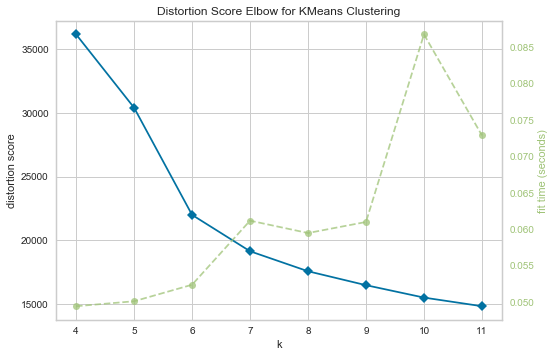

In [43]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12), metric = 'distortion')
visualizer.fit(X)
visualizer.poof()


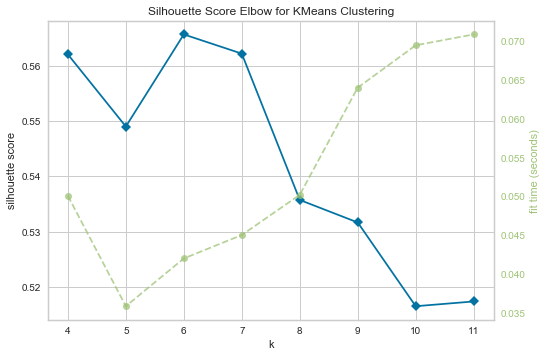

In [44]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12), metric = 'silhouette')
visualizer.fit(X)
visualizer.poof()

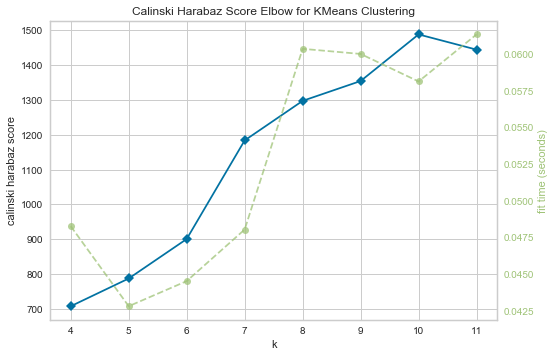

In [45]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12), metric = 'calinski_harabaz')
visualizer.fit(X)
visualizer.poof()

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

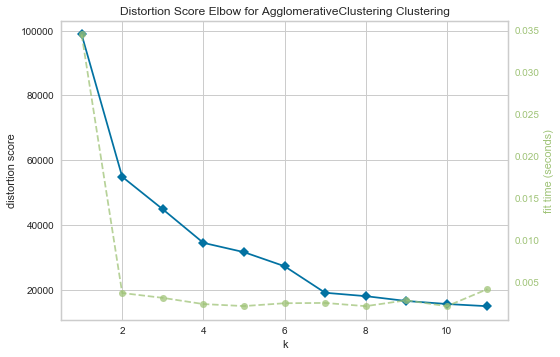

In [35]:

model = cluster.AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(1,12), metric ="distortion")
visualizer.fit(X)
visualizer.poof()

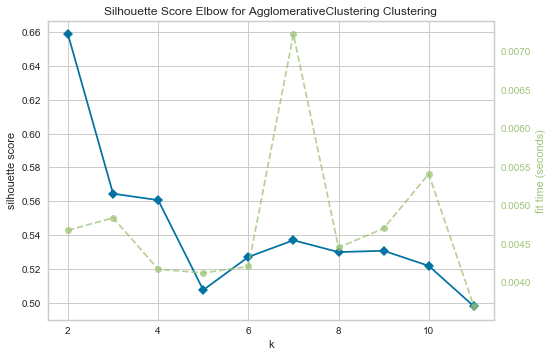

In [36]:
model = cluster.AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,12), metric ="silhouette")
visualizer.fit(X)
visualizer.poof()

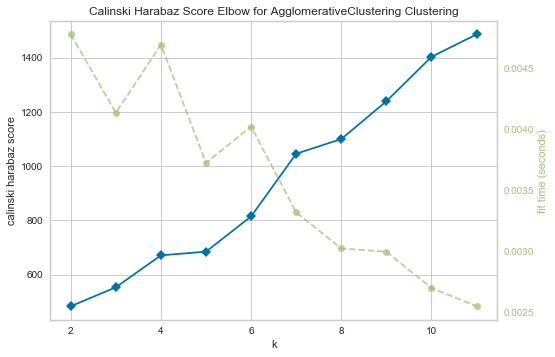

In [37]:
model = cluster.AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,12), metric ="calinski_harabaz")
visualizer.fit(X)
visualizer.poof()

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


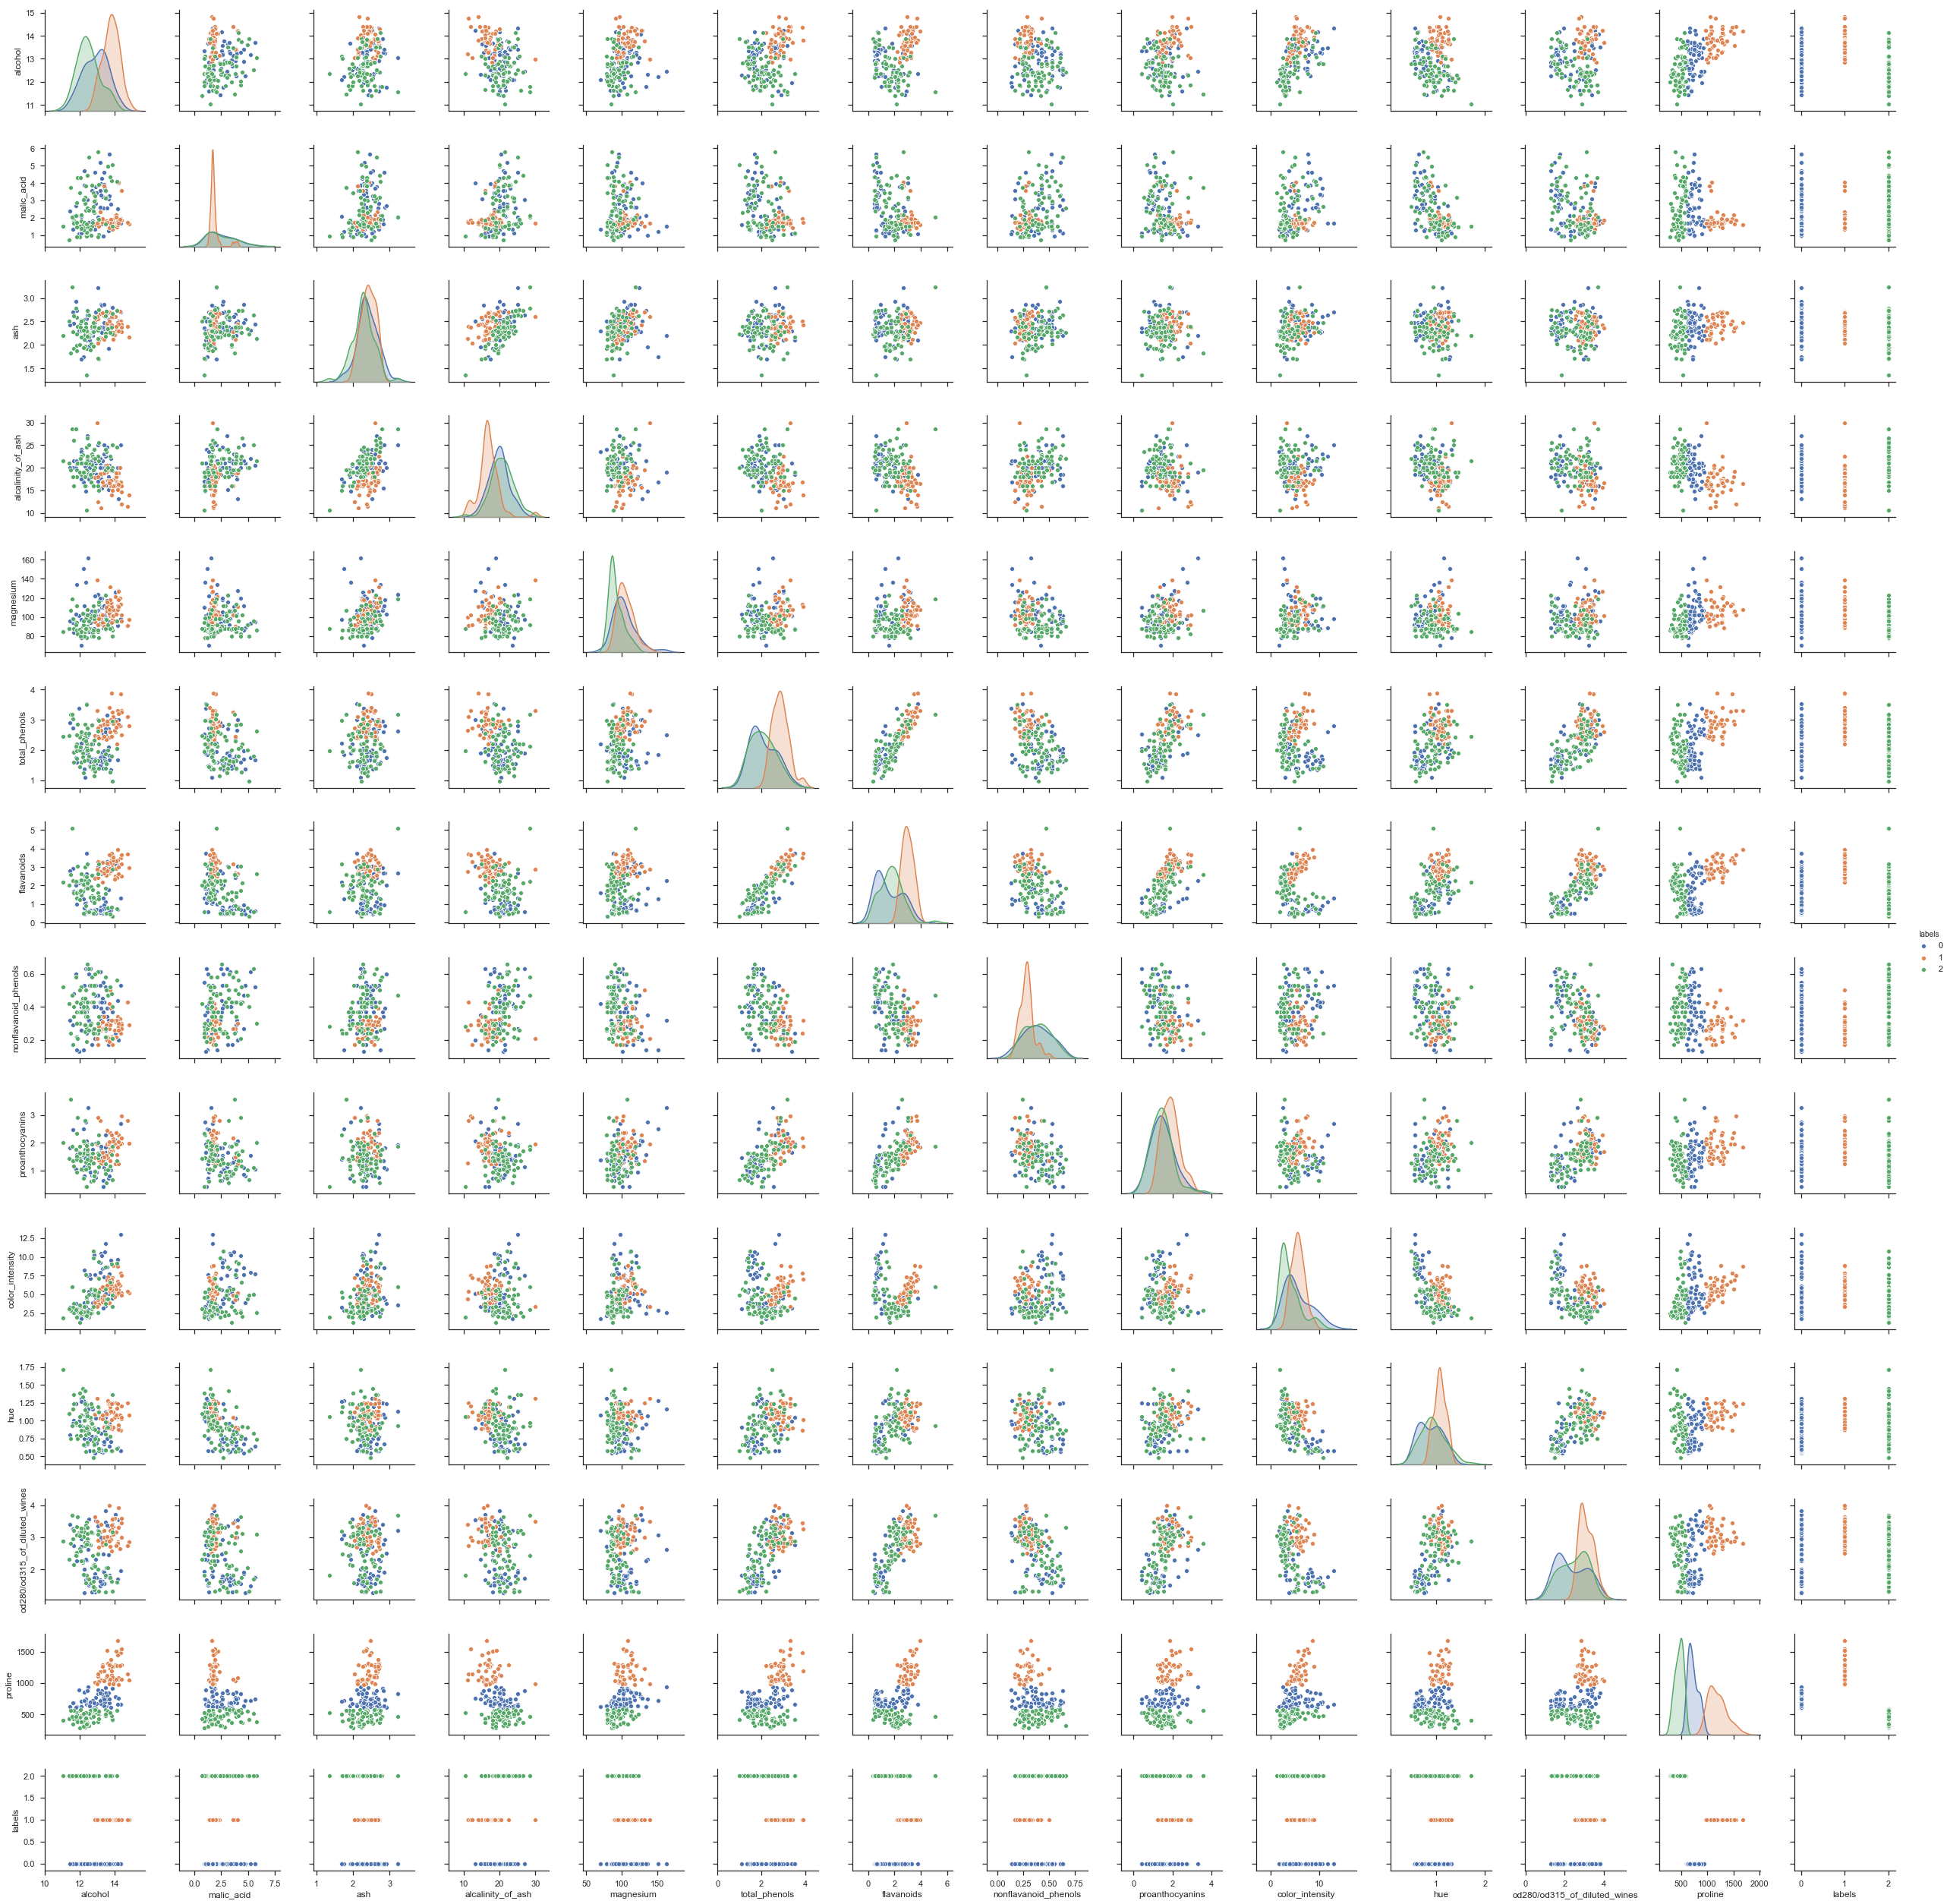

In [52]:
X['labels'] = data_clusters3.labels_

sns.set(style="ticks")
sns.pairplot(X, hue = 'labels')

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

Text(0, 0.5, 'PCA 2')

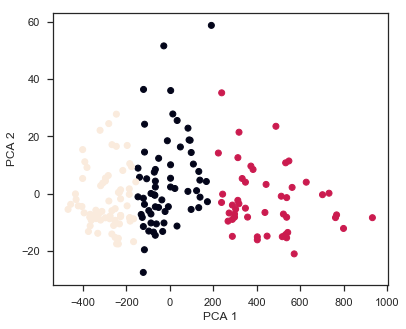

In [57]:

pca = PCA()
pca.fit(X)
pca_X = pca.transform(X)

plt.subplots(1,1,figsize=(6,5))

plt.scatter(pca_X[:, 0], pca_X[:, 1], c =X.labels)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")


## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

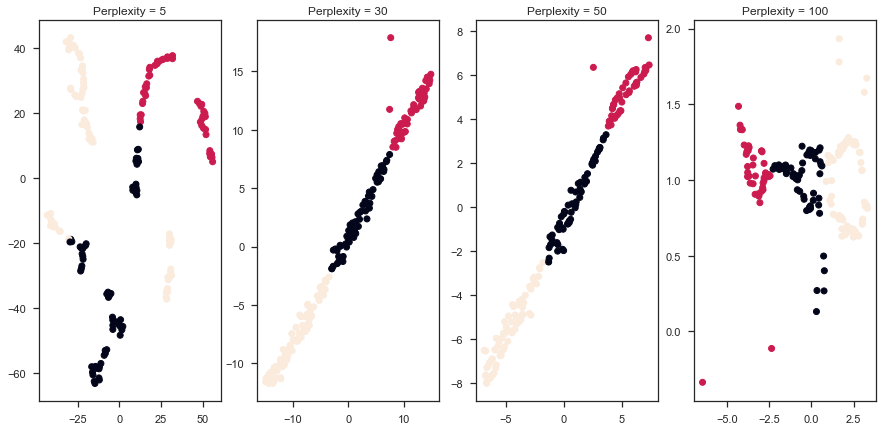

In [59]:

fig, ax = plt.subplots(1, 4, figsize=(15, 7))
for i, perp in enumerate([5, 30, 50, 100]):
    tsne = TSNE(perplexity=perp)
    x_embedded = tsne.fit_transform(X)
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c=X.labels)
    ax[i].set_title("Perplexity = {}".format(perp))
    